#### MATH 448 Project Report 1 (EDA): 
#### Understanding Public Data and Predict Probability of Success of Newly Opening Business.


* Data Extraction

* Data Preperation

* Data Visualization


In [1]:
# Requring Library
import requests
import pandas as pd
import pprint
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim



from api_key import API_key

In [2]:
# Read csv file
df = pd.read_csv("data/November_2014_Street_Cleaning_TTC_20240213.csv")


,CaseID,Opened,Closed,Updated,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,4165985,11/01/2014 12:06:00 AM,11/01/2014 12:58:50 AM,11/01/2014 12:58:50 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,3.0,Financial District,"(37.79240799, -122.39859009)",Integrated Agency,NaN
1,4165986,11/01/2014 12:06:03 AM,11/01/2014 06:40:33 AM,11/01/2014 06:40:33 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",11.0,Mission Terrace,"(37.72815704, -122.43209076)",Integrated Agency,NaN
2,4166013,11/01/2014 12:47:19 AM,11/01/2014 10:00:31 AM,11/01/2014 10:00:31 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",11.0,Mission Terrace,"(37.72815704, -122.43209076)",Integrated Agency,NaN
3,4166014,11/01/2014 12:47:21 AM,11/01/2014 12:59:28 AM,11/01/2014 12:59:28 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,3.0,Financial District,"(37.79240799, -122.39859009)",Integrated Agency,NaN
4,4166015,11/01/2014 12:47:24 AM,11/01/2014 06:44:04 AM,11/01/2014 06:44:04 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,Intersection of LEAVENWORTH ST and EDDY ST,5.0,Tenderloin,"(37.78372192, -122.41423798)",Integrated Agency,NaN


In [41]:
# Check columns and data type
df.dtypes

CaseID                   int64
Opened                  object
Closed                  object
Updated                 object
Status                  object
Responsible Agency      object
Category                object
Request Type            object
Request Details         object
Address                 object
Supervisor District    float64
Neighborhood            object
Point                   object
Source                  object
Media URL               object
dtype: object

In [3]:
df2 = df.copy()

# Split 'Point' column into separate 'Latitude' and 'Longitude' columns
df2[['Latitude', 'Longitude']] = df2['Point'].str.strip('()').str.split(',', expand=True)

# Convert the values to float
df2['Latitude'] = df2['Latitude'].astype(float)
df2['Longitude'] = df2['Longitude'].astype(float)

# Drop the original 'Point' column if no longer needed
df2.drop(columns=['Point'], inplace=True)



,CaseID,Opened,Closed,Updated,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Source,Media URL,Latitude,Longitude
0,4165985,11/01/2014 12:06:00 AM,11/01/2014 12:58:50 AM,11/01/2014 12:58:50 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,3.0,Financial District,Integrated Agency,NaN,37.792408,-122.398590
1,4165986,11/01/2014 12:06:03 AM,11/01/2014 06:40:33 AM,11/01/2014 06:40:33 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",11.0,Mission Terrace,Integrated Agency,NaN,37.728157,-122.432091
2,4166013,11/01/2014 12:47:19 AM,11/01/2014 10:00:31 AM,11/01/2014 10:00:31 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",11.0,Mission Terrace,Integrated Agency,NaN,37.728157,-122.432091
3,4166014,11/01/2014 12:47:21 AM,11/01/2014 12:59:28 AM,11/01/2014 12:59:28 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,3.0,Financial District,Integrated Agency,NaN,37.792408,-122.398590
4,4166015,11/01/2014 12:47:24 AM,11/01/2014 06:44:04 AM,11/01/2014 06:44:04 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,Intersection of LEAVENWORTH ST and EDDY ST,5.0,Tenderloin,Integrated Agency,NaN,37.783722,-122.414238


In [43]:
# Count NaNs in each column
nan_counts = df2.isna().sum()

# Display NaN counts for each column
print(nan_counts)

CaseID                    0
Opened                    0
Closed                    1
Updated                   0
Status                    0
Responsible Agency        0
Category                  0
Request Type              0
Request Details         406
Address                   0
Supervisor District     116
Neighborhood            120
Source                    0
Media URL              6044
Latitude                  0
Longitude                 0
dtype: int64


In [44]:
df2['Request Type'].unique()


array(['Overflowing_City_Receptacle_or_Dumpster', 'Bulky Items',
       'General Cleaning', 'Door_Lock_issues', 'Human or Animal Waste',
       'Hazardous Materials', 'Automotive', 'Cans_Left_Out_24x7',
       'Tipped_over', 'Litter_Receptacle_Request_New_Removal',
       'Medical Waste', 'Debris_Box', 'Liner_issues', 'Damaged_City_Can',
       'Other_enter_additional_details_below',
       'Missed_Route_Mechanical_Sweeping', 'Recycling_top_issues',
       'Damaged_door_lock_issues'], dtype=object)

In [45]:
df2['Request Details'].unique()

array(['Overflowing_City_Receptacle_or_Dumpster', 'Refrigerator',
       'Other Loose Garbage', nan, 'Mattress', 'Furniture',
       'Human or Animal Waste', 'Glass', 'Tires', 'Paper Spill',
       'Needles', 'Liquids - Oil/Paint/Other', 'Electronics',
       'Missed_Route_Mechanical_Sweeping', 'Event_parade_mess',
       'Auto_accident_debris', 'Car Batteries'], dtype=object)

In [46]:
count_nan = df2["Request Type"].str.count("Human or Animal Waste").sum()
print("Count of 'Human or Animal Waste':", count_nan)

Count of 'Human or Animal Waste': 693


In [4]:
# Delete the unreleveent columns
df3 = df2.drop(['Media URL',
                'Request Details',
                'Supervisor District'],
               axis=1)

df3.head()

,CaseID,Opened,Closed,Updated,Status,Responsible Agency,Category,Request Type,Address,Neighborhood,Source,Latitude,Longitude
0,4165985,11/01/2014 12:06:00 AM,11/01/2014 12:58:50 AM,11/01/2014 12:58:50 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,Financial District,Integrated Agency,37.792408,-122.398590
1,4165986,11/01/2014 12:06:03 AM,11/01/2014 06:40:33 AM,11/01/2014 06:40:33 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",Mission Terrace,Integrated Agency,37.728157,-122.432091
2,4166013,11/01/2014 12:47:19 AM,11/01/2014 10:00:31 AM,11/01/2014 10:00:31 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,"4340 MISSION ST, SAN FRANCISCO, CA, 94112",Mission Terrace,Integrated Agency,37.728157,-122.432091
3,4166014,11/01/2014 12:47:21 AM,11/01/2014 12:59:28 AM,11/01/2014 12:59:28 AM,Closed,Recology_Overflowing,Street and Sidewalk Cleaning,Overflowing_City_Receptacle_or_Dumpster,Intersection of PINE ST and FRONT ST,Financial District,Integrated Agency,37.792408,-122.398590
4,4166015,11/01/2014 12:47:24 AM,11/01/2014 06:44:04 AM,11/01/2014 06:44:04 AM,Closed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Intersection of LEAVENWORTH ST and EDDY ST,Tenderloin,Integrated Agency,37.783722,-122.414238


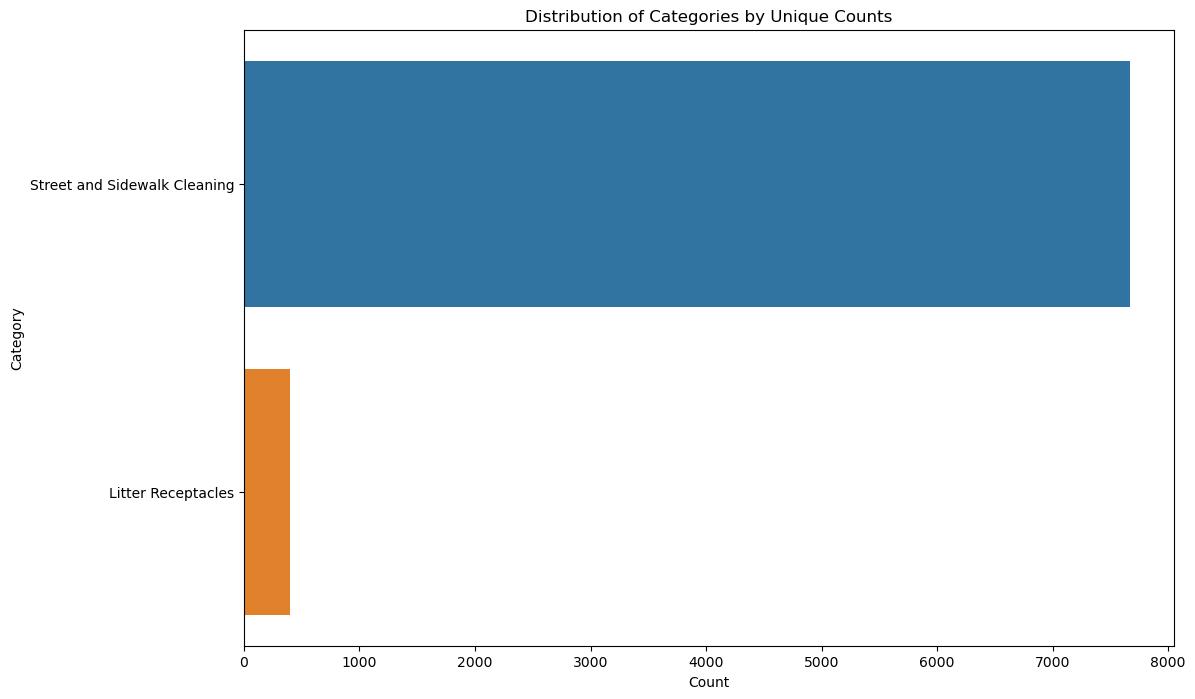

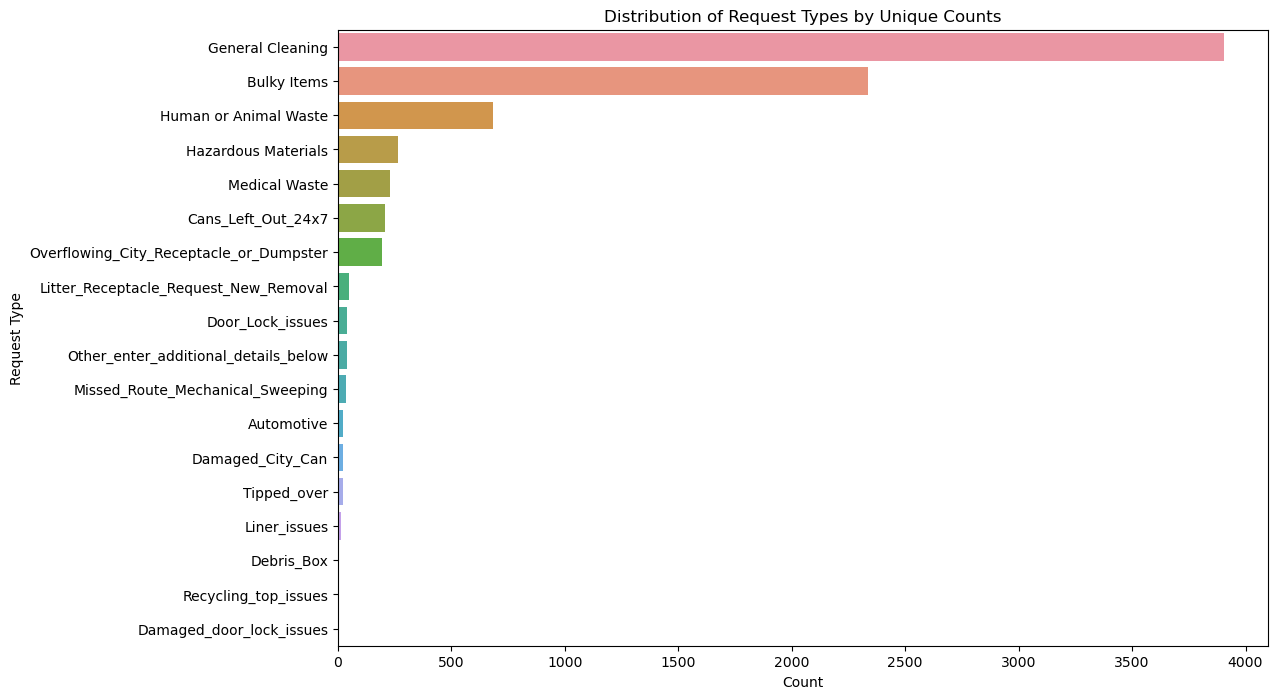

In [48]:
public_data = df3.dropna()

# Count unique values in 'Category' and 'Request Type' columns
category_counts = public_data['Category'].value_counts()
request_type_counts = public_data['Request Type'].value_counts()

# Plot the distribution of 'Category' by unique counts
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Distribution of Categories by Unique Counts')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Plot the distribution of 'Request Type' by unique counts
plt.figure(figsize=(12, 8))
sns.barplot(x=request_type_counts.values, y=request_type_counts.index)
plt.title('Distribution of Request Types by Unique Counts')
plt.xlabel('Count')
plt.ylabel('Request Type')
plt.show()

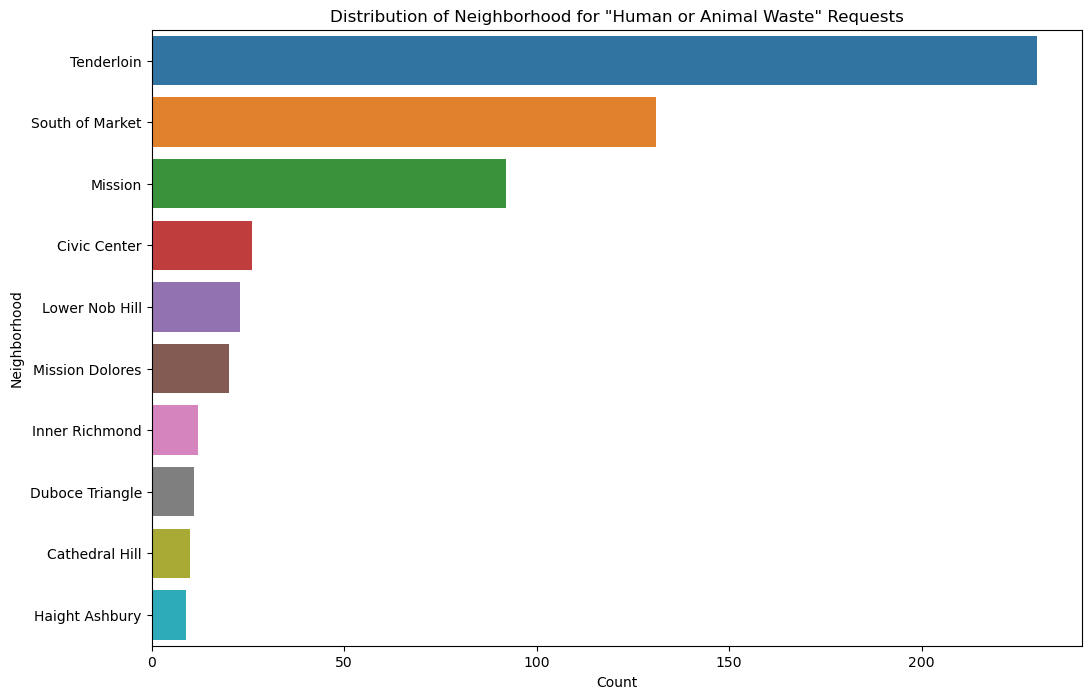

In [49]:
# Filter the DataFrame for rows where 'Request Type' is 'Human or Animal Waste'
filtered_df = public_data[public_data['Request Type'] == 'Human or Animal Waste']

# Plot the distribution of 'Neighborhood' for filtered data
plt.figure(figsize=(12, 8))
sns.countplot(y='Neighborhood', data=filtered_df, order=filtered_df['Neighborhood'].value_counts().index[:10]) # Display top 10 neighborhoods
plt.title('Distribution of Neighborhood for "Human or Animal Waste" Requests')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

In [5]:
# Read csv file
df = pd.read_csv("data/Street_and_Sidewalk_Cleaning_20240314.csv")

rowcount = len(df)

print(f"Number of rows in Dataframe is {rowcount}")

df.head()

Number of rows in Dataframe is 2645368


,CaseID,Opened,Closed,Status,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Updated,Point,Source
0,17994864,03/13/2024 01:46:35 AM,NaN,Open,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"15 EXCELSIOR AVE, SAN FRANCISCO, CA, 94112",11.0,Excelsior,03/13/2024 04:47:01 AM,"(37.7263142, -122.43350032)",Mobile/Open311
1,17994862,03/13/2024 01:37:24 AM,NaN,Open,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"3789 24TH ST, SAN FRANCISCO, CA, 94114",8.0,Dolores Heights,03/13/2024 04:46:52 AM,"(37.75162609, -122.42725189)",Mobile/Open311
2,17994861,03/13/2024 01:33:41 AM,NaN,Open,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"103 CARL ST, SAN FRANCISCO, CA, 94117",8.0,Cole Valley,03/13/2024 04:46:16 AM,"(37.7656267, -122.450183)",Mobile/Open311
3,17994851,03/13/2024 01:21:58 AM,NaN,Open,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"1890 BRYANT ST, SAN FRANCISCO, CA, 94110",9.0,Mission,03/13/2024 04:46:10 AM,"(37.7631583, -122.41038526)",Mobile/Open311
4,17994849,03/13/2024 01:19:06 AM,NaN,Open,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"275 BATTERY ST, SAN FRANCISCO, CA, 94111",3.0,Financial District,03/13/2024 04:46:04 AM,"(37.79400974, -122.40020655)",Mobile/Open311


In [51]:
# Count NaNs in each column
nan_counts = df.isna().sum()

# Display NaN counts for each column
print(nan_counts)

CaseID                     0
Opened                     0
Closed                 13376
Status                     0
Responsible Agency         0
Category                   0
Request Type               0
Request Details          487
Address                    8
Supervisor District    11338
Neighborhood           13111
Updated                    0
Point                      0
Source                     0
dtype: int64


In [6]:
df2 = df.copy()

# Delete the unreleveent columns
df3 = df2.drop(['Closed',
                'Status',
                'Request Details',
                'Supervisor District',
                'Updated'
                ],
               axis=1)

# Split 'Point' column into separate 'Latitude' and 'Longitude' columns
df3[['Latitude', 'Longitude']] = df3['Point'].str.strip('()').str.split(',', expand=True)

# Convert the values to float
df3['Latitude'] = df3['Latitude'].astype(float)
df3['Longitude'] = df3['Longitude'].astype(float)

# Drop the original 'Point' column if no longer needed
df3.drop(columns=['Point'], inplace=True)

# Display the modified DataFrame
df3.head()

,CaseID,Opened,Responsible Agency,Category,Request Type,Address,Neighborhood,Source,Latitude,Longitude
0,17994864,03/13/2024 01:46:35 AM,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,"15 EXCELSIOR AVE, SAN FRANCISCO, CA, 94112",Excelsior,Mobile/Open311,37.726314,-122.433500
1,17994862,03/13/2024 01:37:24 AM,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,"3789 24TH ST, SAN FRANCISCO, CA, 94114",Dolores Heights,Mobile/Open311,37.751626,-122.427252
2,17994861,03/13/2024 01:33:41 AM,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,"103 CARL ST, SAN FRANCISCO, CA, 94117",Cole Valley,Mobile/Open311,37.765627,-122.450183
3,17994851,03/13/2024 01:21:58 AM,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,"1890 BRYANT ST, SAN FRANCISCO, CA, 94110",Mission,Mobile/Open311,37.763158,-122.410385
4,17994849,03/13/2024 01:19:06 AM,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,"275 BATTERY ST, SAN FRANCISCO, CA, 94111",Financial District,Mobile/Open311,37.794010,-122.400207


In [10]:
public_data = df3.dropna()

# Filter the DataFrame for rows where 'Request Type' is 'Human or Animal Waste'
filtered_df = public_data[public_data['Request Type'] == 'Human or Animal Waste']

filtered_df.head()

,CaseID,Opened,Responsible Agency,Category,Request Type,Address,Neighborhood,Source,Latitude,Longitude
8,17994832,03/13/2024 12:33:00 AM,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,Intersection of 7TH ST and MINNA ST,South of Market,Phone,0.000000,0.000000
86,17994463,03/12/2024 07:10:00 PM,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,"590 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",Mission,Mobile/Open311,37.763757,-122.417641
87,17994465,03/12/2024 07:10:00 PM,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,"590 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",Mission,Mobile/Open311,37.763766,-122.417581
88,17994464,03/12/2024 07:10:00 PM,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,"1619 NORTH POINT ST, SAN FRANCISCO, CA, 94123",Marina,Web,37.804030,-122.433811
105,17994383,03/12/2024 06:35:00 PM,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,"1177 CALIFORNIA ST, SAN FRANCISCO, CA, 94108",Nob Hill,Mobile/Open311,37.791434,-122.413509


In [54]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
filtered_data_copy = filtered_df.copy()

# Convert 'Opened' column to datetime format
filtered_data_copy['Opened'] = pd.to_datetime(filtered_data_copy['Opened'])

# Extract the year from the 'Opened' column and create a new column 'Year'
filtered_data_copy['Year'] = filtered_data_copy['Opened'].dt.year

# Count the number of entries in each year
entries_per_year = filtered_data_copy['Year'].value_counts().sort_index()

print("Number of entries in each year:")
print(entries_per_year)

Number of entries in each year:
2008     1678
2009     5381
2010     5690
2011     5428
2012     6093
2013     8608
2014    10489
2015    13117
2016    18427
2017    20870
2018    28320
2019    30979
2020    28270
2021    30012
2022    34579
2023    35958
2024     7107
Name: Year, dtype: int64


In [12]:
#CaseID	Opened	Responsible Agency	Category	Request Type	
#Address	Neighborhood	Source	Latitude	Longitude
select_df = public_data[
    [
        "CaseID",
        "Opened",
        "Neighborhood",
        "Latitude",
        "Longitude"
    ]
]

# Convert "Opened" column to datetime
select_df["Opened"] = pd.to_datetime(select_df["Opened"])

# Extract year from the datetime column
select_df["Year"] = select_df["Opened"].dt.year

# Drop the original "Opened" column if you no longer need it
select_df.drop(columns=["Opened"], inplace=True)



/var/folders/nr/wcvbzzhs3kv4kdwf1t2qdjww0000gn/T/ipykernel_82242/3315457509.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df["Opened"] = pd.to_datetime(select_df["Opened"])
/var/folders/nr/wcvbzzhs3kv4kdwf1t2qdjww0000gn/T/ipykernel_82242/3315457509.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df["Year"] = select_df["Opened"].dt.year
/var/folders/nr/wcvbzzhs3kv4kdwf1t2qdjww0000gn/T/ipykernel_82242/3315457509.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,CaseID,Neighborhood,Latitude,Longitude,Year
0,17994864,Excelsior,37.726314,-122.433500,2024
1,17994862,Dolores Heights,37.751626,-122.427252,2024
2,17994861,Cole Valley,37.765627,-122.450183,2024
3,17994851,Mission,37.763158,-122.410385,2024
4,17994849,Financial District,37.794010,-122.400207,2024
...,...,...,...,...,...
2645363,240227,Bernal Heights,37.747173,-122.422386,2008
2645364,240226,Bernal Heights,37.747173,-122.422386,2008
2645365,240222,Bernal Heights,37.740643,-122.423088,2008
2645366,240216,Inner Sunset,37.761745,-122.475922,2008


In [13]:
# Assuming select_df is your DataFrame
grouped_df = select_df.groupby(["Year", "Neighborhood"]).agg(
    Case_Count=("CaseID", "count"),  # Count of cases
    Median_Latitude=("Latitude", "median"),  # Median latitude
    Median_Longitude=("Longitude", "median")  # Median longitude
).reset_index()

# Display the grouped DataFrame
grouped_df

,Year,Neighborhood,Case_Count,Median_Latitude,Median_Longitude
0,2008,Alamo Square,88,37.775396,-122.435890
1,2008,Anza Vista,20,37.781189,-122.441219
2,2008,Apparel City,31,37.737862,-122.404304
3,2008,Aquatic Park / Ft. Mason,35,37.805496,-122.422005
4,2008,Ashbury Heights,34,37.763199,-122.449364
...,...,...,...,...,...
1978,2024,West Portal,495,37.739552,-122.467321
1979,2024,Western Addition,1323,37.779119,-122.433893
1980,2024,Westwood Highlands,9,37.733624,-122.457146
1981,2024,Westwood Park,57,37.724102,-122.456106


In [24]:
# Save the grouped DataFrame to a CSV file
grouped_df.to_csv("data/train_data.csv", index=False)

In [16]:
# Set up Yelp API credentials
headers = {
    'Authorization': f'Bearer {API_key}'
}

# Set up the search parameters
search_terms = ['laundry', 'shoe cleaning', 'coin laundry']  # Additional keywords related to cleaning
location = 'San Francisco'

# Set up the Yelp API endpoint for business search
url = 'https://api.yelp.com/v3/businesses/search'

# Initialize an empty list to store all business data
all_businesses = []

# Set initial parameters and loop through search terms
for term in search_terms:
    params = {
        'term': term,
        'location': location,
        'limit': 50,  # Maximum limit per request
        'offset': 0   # Initial offset
    }

    # Make API requests until all results are retrieved
    while True:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        businesses = data['businesses']
        all_businesses.extend(businesses)

        # Update offset for the next request
        params['offset'] += params['limit']

        # Check if there are no more results
        if len(businesses) < params['limit']:
            break

# Now all_businesses contains all retrieved businesses
print("Total businesses retrieved:", len(all_businesses))


Total businesses retrieved: 1123


In [17]:
# Convert JSON data to DataFrame
df = pd.json_normalize(all_businesses)

# Display DataFrame
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,Mj4tcZ6syrCYN06odfvVeA,the-laundry-corner-san-francisco,The Laundry Corner,https://s3-media4.fl.yelpcdn.com/bphoto/F75Pu5...,False,https://www.yelp.com/biz/the-laundry-corner-sa...,57,"[{'alias': 'laundryservices', 'title': 'Laundr...",4.8,[],...,37.775207,-122.464703,700 7th Ave,,,San Francisco,94118,US,CA,"[700 7th Ave, San Francisco, CA 94118]"
1,QGXNhbta97tUZpxxBOoldw,laundré-san-francisco-3,Laundré,https://s3-media2.fl.yelpcdn.com/bphoto/0g2D4z...,False,https://www.yelp.com/biz/laundr%C3%A9-san-fran...,151,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",4.3,[],...,37.758526,-122.418651,3487 20th St,None,,San Francisco,94110,US,CA,"[3487 20th St, San Francisco, CA 94110]"
2,wKf6lk5GkxpSC8t7dC3iJA,laundré-san-francisco-7,Laundré,https://s3-media3.fl.yelpcdn.com/bphoto/Xzqag3...,False,https://www.yelp.com/biz/laundr%C3%A9-san-fran...,53,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",4.5,[],...,37.781086,-122.439314,1233 Divisadero St,None,,San Francisco,94115,US,CA,"[1233 Divisadero St, San Francisco, CA 94115]"
3,TsXk1Tvi0AUmNfDfhaUK5g,sunset-laundry-and-cleaner-san-francisco,Sunset Laundry & Cleaner,https://s3-media1.fl.yelpcdn.com/bphoto/PSMCE3...,False,https://www.yelp.com/biz/sunset-laundry-and-cl...,49,"[{'alias': 'dryclean', 'title': 'Dry Cleaning'}]",4.1,[],...,37.761954,-122.465994,1404 9th Ave,,,San Francisco,94122,US,CA,"[1404 9th Ave, San Francisco, CA 94122]"
4,sWk4F2rsHOdzMA7q_YUEzg,launderland-san-francisco-7,Launderland,https://s3-media4.fl.yelpcdn.com/bphoto/xef47q...,False,https://www.yelp.com/biz/launderland-san-franc...,24,"[{'alias': 'laundromat', 'title': 'Laundromat'}]",4.3,[],...,37.726660,-122.464900,2020 Ocean Ave,,None,San Francisco,94127,US,CA,"[2020 Ocean Ave, San Francisco, CA 94127]"


In [58]:
df.dtypes

id                           object
alias                        object
name                         object
image_url                    object
is_closed                      bool
url                          object
review_count                  int64
categories                   object
rating                      float64
transactions                 object
price                        object
phone                        object
display_phone                object
distance                    float64
coordinates.latitude        float64
coordinates.longitude       float64
location.address1            object
location.address2            object
location.address3            object
location.city                object
location.zip_code            object
location.country             object
location.state               object
location.display_address     object
dtype: object

In [59]:
# Count NaNs in each column
nan_counts = df.isna().sum()

# Display NaN counts for each column
print(nan_counts)

id                            0
alias                         0
name                          0
image_url                     0
is_closed                     0
url                           0
review_count                  0
categories                    0
rating                        0
transactions                  0
price                       278
phone                         0
display_phone                 0
distance                      0
coordinates.latitude          0
coordinates.longitude         0
location.address1            15
location.address2           196
location.address3           104
location.city                 0
location.zip_code             0
location.country              0
location.state                0
location.display_address      0
dtype: int64


In [18]:
df2 = df.copy()

# Define the mapping of columns you want to rename
column_mapping = {
    'name': 'Name',
    'coordinates.latitude': 'Latitude',
    'coordinates.longitude': 'Longitude',
    'location.address1': 'Address',
    'location.city': 'City',
    'location.zip_code': 'Zip_code',
    'location.country': 'Country',
    'location.state': 'State',
    'location.display_address': 'Display_address'
}

# Rename the columns using the mapping
df2.rename(columns=column_mapping, inplace=True)

# # Remove square brackets from the 'display_address' column
# df2['Display_address'] = df2['Display_address'].str[1:-1]

# duplicate existing dataframe
df3 = df2.copy()

# Delete the unreleveent columns
df4 = df3[[
    'Name',
    'Latitude',
    'Longitude',
    'Address',
    'City',
    'Zip_code',
    'Display_address'
    ]
]

yelp_data = df4.dropna()

yelp_data

,Name,Latitude,Longitude,Address,City,Zip_code,Display_address
0,The Laundry Corner,37.775207,-122.464703,700 7th Ave,San Francisco,94118,"[700 7th Ave, San Francisco, CA 94118]"
1,Laundré,37.758526,-122.418651,3487 20th St,San Francisco,94110,"[3487 20th St, San Francisco, CA 94110]"
2,Laundré,37.781086,-122.439314,1233 Divisadero St,San Francisco,94115,"[1233 Divisadero St, San Francisco, CA 94115]"
3,Sunset Laundry & Cleaner,37.761954,-122.465994,1404 9th Ave,San Francisco,94122,"[1404 9th Ave, San Francisco, CA 94122]"
4,Launderland,37.726660,-122.464900,2020 Ocean Ave,San Francisco,94127,"[2020 Ocean Ave, San Francisco, CA 94127]"


In [23]:
# Save the yelp DataFrame to a CSV file
yelp_data.to_csv("data/yelp_data.csv", index=False)

In [7]:
# Cache for storing already retrieved coordinates
coordinate_cache = {}

# Function to get neighborhood from coordinates with caching
def get_neighborhood(latitude, longitude):
    if (latitude, longitude) in coordinate_cache:
        return coordinate_cache[(latitude, longitude)]
    else:
        geolocator = Nominatim(user_agent="neighborhood_locator")
        location = geolocator.reverse((latitude, longitude), exactly_one=True)
        address = location.raw['address']
        if 'neighbourhood' in address:
            neighborhood = address['neighbourhood']
        elif 'suburb' in address:
            neighborhood = address['suburb']
        elif 'city_district' in address:
            neighborhood = address['city_district']
        else:
            neighborhood = None
        coordinate_cache[(latitude, longitude)] = neighborhood
        return neighborhood

# Apply the function to the DataFrame
yelp_data['Neighborhood'] = yelp_data.apply(lambda row: get_neighborhood(row['Latitude'], row['Longitude']), axis=1)

yelp_data


                          Name   Latitude   Longitude             Address  \
0           The Laundry Corner  37.775207 -122.464703         700 7th Ave   
1                      Laundré  37.758526 -122.418651        3487 20th St   
2                      Laundré  37.781086 -122.439314  1233 Divisadero St   
3     Sunset Laundry & Cleaner  37.761954 -122.465994        1404 9th Ave   
4                  Launderland  37.726660 -122.464900      2020 Ocean Ave   
...                        ...        ...         ...                 ...   
1103     Clean Living Cleaners  37.890657 -122.285961     1538 Solano Ave   
1104        Park Blvd Cleaners  37.801851 -122.244714      2349 Park Blvd   
1105           Miller Cleaners  37.898779 -122.538877      322 Miller Ave   
1106          A Touch of Class  37.959998 -122.555671      32 Ross Common   
1107          Holiday Cleaners  37.579944 -122.333063   850 N Delaware St   

               City  Zip_code  \
0     San Francisco     94118   
1     San

In [9]:
# Count NaN values in the 'Neighborhood' column
na_count = yelp_data['Neighborhood'].isna().sum()

print("Number of NaN values in the 'Neighborhood' column:", na_count)

Number of NaN values in the 'Neighborhood' column: 351


In [11]:
# Get unique values in the 'Neighborhood' column
unique_neighborhoods = yelp_data['Neighborhood'].unique()

print("Unique neighborhoods:", unique_neighborhoods)


Unique neighborhoods: ['Richmond District' 'Mission District' 'Western Addition' 'Inner Sunset'
 None 'Presidio Terrace' 'Castro District' 'Lower Nob Hill' 'Jordan Park'
 'Duboce Triangle' 'Pacific Heights' 'North of Panhandle' 'Cole Valley'
 'Sunset District' 'Lower Pacific Heights' 'Lower Haight' 'Haight-Ashbury'
 'Cow Hollow' 'Marina District' 'Nob Hill' 'Noe Valley' 'South Beach'
 'Excelsior' 'Presidio Heights' 'Potrero Hill' 'North Beach' 'Seacliff'
 'West Portal' 'Hayes Valley' 'Tenderloin' 'Westlake' 'Bernal Heights'
 'Russian Hill' 'Ocean View' 'Silver Terrace' 'Dogpatch' 'Chinatown'
 'Saint Francis Wood' 'West SoMa' 'Ingleside' 'Union Square'
 'Financial District' 'Telegraph Hill' 'Cleveland Heights'
 'Potrero Terrace' 'Glen Park' 'South of Market' 'Sharp Park'
 "Fisherman's Wharf" 'South Shore' 'West Berkeley' 'Rincon Hill'
 'West End' "St. Mary's Park" 'Bayview District' 'Albany Hill'
 'Harmon Tract' 'Portola' 'Northgate / Koreatown' 'Crocker-Amazon'
 'Elmwood' 'Visitacion V

In [13]:
# Assuming yelp_data is a DataFrame
select_df = yelp_data[
    [   
        "Neighborhood",
        "Latitude",
        "Longitude"
    ]
].copy()  # Make a copy to avoid modifying the original DataFrame

# Adding a new column "Year" with all values set to 2024
select_df["Year"] = 2024

# test_data will contain only non-null values in the original DataFrame
test_data = select_df.dropna()

# Save the grouped DataFrame to a CSV file
test_data.to_csv("data/test_data.csv", index=False)


In [14]:
# Count NaNs in each column
nan_counts = test_data.isna().sum()

# Display NaN counts for each column
print(nan_counts)

Neighborhood    0
Latitude        0
Longitude       0
Year            0
dtype: int64


In [15]:
train_data = pd.read_csv("data/train_data.csv")

# Count NaNs in each column
nan_counts = train_data.isna().sum()

# Display NaN counts for each column
print(nan_counts)

Year                0
Neighborhood        0
Case_Count          0
Median_Latitude     0
Median_Longitude    0
dtype: int64
